# <center>Olympic History Stats - SQL + EDA</center>

<hr style="border: none; border-top: 1px solid #000;">

<center>
    <span>
        Created by <b>Ian Yap</b>
        &emsp;|&emsp;
        Data from <a href="https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data"><b>Kaggle</b></a>
        &nbsp;
    </span>
</center>

<br>

<center>
    <span>
        <a href="https://www.linkedin.com/in/ian-yap-052870139/"><b>LinkedIn</b></a>
        &emsp;|&emsp;
        <a href="https://xiyap.github.io/"><b>Portfolio</b></a>
    </span>
</center>
    
<hr style="border: none; border-top: 1px solid #000;">


## Table of Contents

1. [Background](#Background)
2. [Objectives](#Objectives)
3. [Feature Information](#Feature_Information)
4. [Import Libraries](#Import_Libraries)
5. [Data Loading](#Data_Loading)
6. [Feature Engineering](#Feature_Engineering)
7. [Exploratory Data Analysis (EDA) & Visualization](#Exploratory_Data_Analysis_(EDA)_&_Visualization)
    - [Hypothesis 1:](#Hypothesis_1:)
    - [Hypothesis 2](#Hypothesis_2:)
    - [Gender Splits Across 1896 - 2016 Olympics:](#Gender_Splits_Across_1896_-_2016_Olympics:)
    - [Ideal Height and Weight of Athlete:](#Ideal_Height_and_Weight_of_Athlete:)
    - [Height and Weight to Medal Count:](#Height_and_Weight_to_Medal_Count:)
8. [Conclusion](#Conclusion)

## <a id='Background' href=#1> Background </a>

In this small project, we will be performing exploratory data analysis and queries utilizing SQL, pandas, matplotlib and seaborn on a dataset regarding Olympic Games. This analysis is performed for our client 'SportsStats' which is a sports analysis firm partnering with local news and elite personal trainers. Our client wants to discover patterns and trends highlighting certain groups, events or countries from these dataset. These insights could help their partners develop news stories or discovering key health insights that they can use for their training programs.

The dataset acquired contains data on the athletes and medal results for 120 years of Olympic history, from Athens 1896 to Rio 2016. The dataset contains athlete information such as the athelete's name, sex, age, height, weight and team and also information regarding the event they participated in such as year and season of the Olympic Games, host city, sport, event and medal won.

Through this dataset, we hope to gain valuable insights regarding the trend of winners in the Olympic Games and also determine some key features which increases an athelete's chances of winning in the Olympic Games.

## <a id='Objectives' href=#1> Objectives </a>

The *main* objective of this project is to **reveal patterns or trends from the Olympic History dataset.**

The *secondary* objective of this project is to **identify the determining factor which impacts an athelete's winning probability.**

## <a id='Feature_Information' href=#1> Feature Information </a>

Athlete Event Dataset:
- **ID**: Unique identifier number for each athlete
- **Name**: Full name of athlete
- **Sex**: Gender of athlete (M or F)
- **Age**: Age of athlete
- **Height**: How tall is the athlete? (cm)
- **Weight**: How heavy is the athlete? (kg)
- **Team**: What team is the athlete in? (country)
- **NOC**: National Olympic Committee of the team (3-letter code)
- **Games**: Year and season of the Olympic Game the athlete participated
- **Year**: Year of the Olympic Game participated
- **Season**: Season of the Olympic Game participated
- **City**: Host city of the Olympic Game participated
- **Sport**: Sport the athelete participated
- **Event**: Event of the sport that the athlete participated
- **Medal**: Medals won or not by participant (Gold, Silver, Bronze, None)

NOC Regions Dataset:
- **NOC**: National Olympic Committee of the team (3-letter code)
- **region**: Region of NOC
- **notes**: Additional notes

## <a id='Import_Libraries' href=#1> Import Libraries </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install ipython-sql
import sqlite3
%load_ext sql
%sql sqlite:///my_database.db
conn = sqlite3.connect('my_database.db')

## <a id='Data_Loading' href=#1> Data Loading </a>

Loading dataset as dataframe to perform feature engineering.

In [3]:
df_athlete_events = pd.read_csv('athlete_events.csv')
df_noc_regions = pd.read_csv('noc_regions.csv')

In [4]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df_noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## <a id='Feature_Engineering' href=#1> Feature Engineering </a>

Perform data wrangling to clean the dataset.

In [6]:
print(f'Number of duplicated rows: {df_athlete_events.duplicated().sum()}')
df_athlete_events.drop_duplicates(inplace = True)
print(f'Number of duplicated rows: {df_athlete_events.duplicated().sum()}')

Number of duplicated rows: 1385
Number of duplicated rows: 0


We remove the duplicated rows as it is impossible for an athlete to win multiple medals in the same event at the same year.

In [7]:
print(f'Number of duplicated rows: {df_noc_regions.duplicated().sum()}')
# df_noc_regions.drop_duplicates(inplace = True)
# print(f'Number of duplicated rows: {df_noc_regions.duplicated().sum()}')

Number of duplicated rows: 0


Next, we check the shape of our dataset.

Looks like the athlete_events dataset has 269,731 rows, 15 columns and the datatypes are correct. While noc_regions has 230 rows, 3 columns with the right datatypes.

In [8]:
df_athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In [9]:
df_noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [10]:
missing_value = df_athlete_events.isna().sum()
missing_value_percentage = (missing_value / len(df_athlete_events)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})

,Total Missing Value,Missing Percentage
ID,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,9315,3.453441
Height,58814,21.804687
Weight,61527,22.810504
Team,0,0.000000
NOC,0,0.000000
Games,0,0.000000
Year,0,0.000000


In [11]:
missing_value = df_noc_regions.isna().sum()
missing_value_percentage = (missing_value / len(df_noc_regions)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})

,Total Missing Value,Missing Percentage
NOC,0,0.000000
region,3,1.304348
notes,209,90.869565


Based on the missing values table, it seems like athlete_events has lots of missing data for 'Age', 'Height', 'Weight' and 'Medal' columns.

Meanwhile, noc_regions has 3 missing 'region' values with 90.8% missing 'notes' value.

To manage these missing values in athlete_events, we will check if the missing age, height and weight of an athelete is available in other rows of the table, and fill them in.

In [12]:
missing_feature = ['Age', 'Height', 'Weight']

for feature in missing_feature:
    missing_rows = df_athlete_events[df_athlete_events[feature].isnull()]

    for index, row in missing_rows.iterrows():
        athlete_name = row['Name']
        filled_row = df_athlete_events.loc[(df_athlete_events['Name'] == athlete_name) & ~df_athlete_events[feature].isnull(), [feature]]

        if not filled_row.empty:
            df_athlete_events.at[index, feature] = filled_row.iloc[0, 0]

In [13]:
missing_value = df_athlete_events.isna().sum()
missing_value_percentage = (missing_value / len(df_athlete_events)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})

,Total Missing Value,Missing Percentage
ID,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,9233,3.423040
Height,58426,21.660840
Weight,61138,22.666286
Team,0,0.000000
NOC,0,0.000000
Games,0,0.000000
Year,0,0.000000


It seems like some rows have been filled, but not much.

For the missing values in 'Medal', it is empty cells which indicates the athlete not achieving a top 3 placing in their event. We will fill them up as 'None' indicating no medals won.

For the remaining missing values, we will have separate tables where one has them remain and the other removed.

In [14]:
df_athlete_events['Medal'].fillna('None', inplace = True)

In [15]:
df_athlete_events_dropna = df_athlete_events.dropna(axis = 0)

For missing values in noc_regions, we will fill them up with relevant information and fill the missing notes with '-':

In [16]:
df_noc_regions[df_noc_regions['region'].isnull()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [17]:
df_noc_regions['region'][168] = 'Refugee Olympic Team'
df_noc_regions['region'][208] = 'Tuvalu'
df_noc_regions['region'][213] = 'Unknown'

In [18]:
df_noc_regions.fillna('-', inplace = True)

In [19]:
missing_value = df_noc_regions.isna().sum()
missing_value_percentage = (missing_value / len(df_noc_regions)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})

,Total Missing Value,Missing Percentage
NOC,0,0.0
region,0,0.0
notes,0,0.0


Explore Athlete_Events using descriptive statistics:

In [20]:
df_athlete_events.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,269731.0,68264.949591,39026.253843,1.0,34655.5,68233.0,102111.0,135571.0
Age,260498.0,25.454625,6.163525,10.0,21.0,24.0,28.0,97.0
Height,211305.0,175.342159,10.516589,127.0,168.0,175.0,183.0,226.0
Weight,208593.0,70.707646,14.347874,25.0,60.0,70.0,79.0,214.0
Year,269731.0,1978.623073,29.752055,1896.0,1960.0,1988.0,2002.0,2016.0


In [21]:
df_athlete_events.select_dtypes(include = 'object').describe().transpose()
# cat_col.transpose()

,count,unique,top,freq
Name,269731,134732,Heikki Ilmari Savolainen,39
Sex,269731,2,M,195353
Team,269731,1184,United States,17598
NOC,269731,230,USA,18604
Games,269731,51,2000 Summer,13821
Season,269731,2,Summer,221167
City,269731,42,London,22297
Sport,269731,66,Athletics,38624
Event,269731,765,Football Men's Football,5733
Medal,269731,4,None,229959


Based on the statistics, we discovered a few interesting data:

1. It looks like we actually have an Olympic Games participant at the age of 10 and 97! Let's look into how this is possible.
2. Heikki Ilmari Savolainen participated in the most events in this period with 39 events.

In [22]:
df_athlete_events[df_athlete_events['Age'] == 10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [23]:
df_athlete_events[df_athlete_events['Age'] == 97]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",None


In [24]:
print(df_athlete_events[df_athlete_events['Name'] == 'Heikki Ilmari Savolainen']['Sport'].describe())

count             39
unique             1
top       Gymnastics
freq              39
Name: Sport, dtype: object


In [25]:
event_count = len(df_athlete_events[df_athlete_events['Name'] == 'Heikki Ilmari Savolainen'])
gold_count = len(df_athlete_events[(df_athlete_events['Name'] == 'Heikki Ilmari Savolainen') & (df_athlete_events['Medal'] == 'Gold')])
silver_count = len(df_athlete_events[(df_athlete_events['Name'] == 'Heikki Ilmari Savolainen') & (df_athlete_events['Medal'] == 'Silver')])
bronze_count = len(df_athlete_events[(df_athlete_events['Name'] == 'Heikki Ilmari Savolainen') & (df_athlete_events['Medal'] == 'Bronze')])
top_3_percent = ((gold_count + silver_count + bronze_count) / event_count ) * 100
print(f'Name: Heikki Ilmari Savolainen \nSport: Gymnastics \nTop 3 Finish Percentage: {top_3_percent:.2f}')

Name: Heikki Ilmari Savolainen 
Sport: Gymnastics 
Top 3 Finish Percentage: 23.08


Looks like our 10 year old participant is Dimitrios Loundras who participated in gymnastics back in 1896 Summer Olympics while John Quincy Adams Ward participated in the 1928 Summer Olympics at the age of 97 in the Art Sculpturing event, which was removed after the 1948 Summer Olympics.

As for our top participant during the 1896 - 2016 period, Heikki Ilmari Savolainen has participated in the sport of gymnastics 39 times, with a 23% top 3 finishing rate.

Convert to SQL:

In [26]:
df_athlete_events.to_sql('athlete_events', conn, index = False, if_exists = 'replace');
df_noc_regions.to_sql('noc_regions', conn, index = False, if_exists = 'replace');
df_athlete_events_dropna.to_sql('athlete_events_dropna', conn, index = False, if_exists = 'replace');

## <a id='Exploratory_Data_Analysis_(EDA)_&_Visualization' href=#1> Exploratory Data Analysis (EDA) & Visualization </a>

EDA is performed to gain understanding on the hypothesis and provide further insights on the patterns and trends of this dataset.

### <a id='Hypothesis_1:' href=#1> Hypothesis 1: </a>

- Countries with a higher population will win more medals in the Olympics.

In [27]:
%%sql
SELECT * 
FROM athlete_events ae LEFT JOIN noc_regions nr ON ae.NOC = nr.NOC
LIMIT 5;

 * sqlite:///my_database.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,NOC_1,region,notes
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,CHN,China,-
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,CHN,China,-
3,Gunnar Nielsen Aaby,M,24.0,None,None,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,DEN,Denmark,-
4,Edgar Lindenau Aabye,M,34.0,None,None,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,DEN,Denmark,-
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,NED,Netherlands,-


In [28]:
%%sql
SELECT Team, Count(*) AS Medal_Count
FROM athlete_events
WHERE Medal IS NOT 'None'
GROUP BY Team
ORDER BY Medal_Count DESC
LIMIT 10;

 * sqlite:///my_database.db
Done.


Team,Medal_Count
United States,5219
Soviet Union,2451
Germany,1984
Great Britain,1673
France,1550
Italy,1527
Sweden,1434
Australia,1306
Canada,1243
Hungary,1127


In [29]:
%%sql
SELECT Team, Medal, Count(*) AS Gold_Medal_Count
FROM athlete_events
WHERE Medal = 'Gold'
GROUP BY Medal, Team
ORDER BY Gold_Medal_Count DESC
LIMIT 10;

 * sqlite:///my_database.db
Done.


Team,Medal,Gold_Medal_Count
United States,Gold,2474
Soviet Union,Gold,1058
Germany,Gold,679
Italy,Gold,535
Great Britain,Gold,519
France,Gold,455
Sweden,Gold,451
Hungary,Gold,432
Canada,Gold,422
East Germany,Gold,369


In [30]:
%%sql
SELECT Team, Medal, Count(*) AS Medal_Count
FROM athlete_events
WHERE Medal IS NOT 'None'
GROUP BY Medal, Team
ORDER BY Medal_Count DESC
LIMIT 20;

 * sqlite:///my_database.db
Done.


Team,Medal,Medal_Count
United States,Gold,2474
United States,Silver,1512
United States,Bronze,1233
Soviet Union,Gold,1058
Soviet Union,Silver,716
Germany,Gold,679
Germany,Bronze,678
Soviet Union,Bronze,677
Germany,Silver,627
Great Britain,Silver,582


The infographic shows the population by country comparison between 2003 and 2023 sorted by population count.

<img src="https://cdn.statcdn.com/Infographic/images/normal/18671.jpeg" alt="Population by country (in million people) in 2003 and 2023" width="60%">

By comparing the total medal count and gold medal count for all participating countries from the 1896 - 2016 Olympic Games to the population graph, we can see that **countries with higher population does not necessarily equate to a higher medal count in the Olympics.**

India, China, Indonesia, Pakistan, Nigeria Brazil, Bangladesh and Mexico all have high populations, however they are not even in the top 10 rankings of Olympic medal counts. A majority of the countries stated are countries from Asia.

The reason they have lower medal counts in the Olympics might be due to a shorter history of participation as countries that gained independence later might have started participating at a later date.

Besides that, Asian countries in general have lower interest and investment in sports as they often prioritize academics. 

Moreover, Asians tend to be physicaller smaller compared to their European or American counterparts, thus making them at a disadvantage in certain sports. We will look further if this is a valid reason behind the lack of medals from Asia countries in the Olympics.

With India and China having an astronomical lead in population over the rest of the world, it would make sense for them to have more winners in the Olympic games, however this is not the case at all. China has emerged as a strong competitor in more recent years but may not have surpassed the historical cumulative medal counts of the top nations yet.

### <a id='Hypothesis_2:' href=#1> Hypothesis 2: </a>

- Participants within the age of 20 to 30 have won more medals in the Olympics.

In [31]:
%%sql
SELECT *
FROM athlete_events_dropna ae LEFT JOIN noc_regions nr ON ae.NOC = nr.NOC
LIMIT 5;

 * sqlite:///my_database.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,NOC_1,region,notes
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,CHN,China,-
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,CHN,China,-
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,NED,Netherlands,-
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None,NED,Netherlands,-
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None,NED,Netherlands,-


In [32]:
%%sql
SELECT Age, Count(*) AS Medal_Count
FROM athlete_events_dropna
WHERE Medal IS NOT 'None'
GROUP BY Age
ORDER BY Medal_Count DESC
LIMIT 10;

 * sqlite:///my_database.db
Done.


Age,Medal_Count
23.0,2752
24.0,2655
25.0,2560
22.0,2552
26.0,2381
27.0,2214
21.0,2142
28.0,1950
29.0,1554
20.0,1554


In [33]:
%%sql
SELECT Age, Medal, Count(*) AS Gold_Medal_Count
FROM athlete_events_dropna
WHERE Medal IS 'Gold'
GROUP BY Medal, Age
ORDER BY Gold_Medal_Count DESC
LIMIT 20;

 * sqlite:///my_database.db
Done.


Age,Medal,Gold_Medal_Count
24.0,Gold,921
23.0,Gold,919
22.0,Gold,897
25.0,Gold,856
26.0,Gold,800
21.0,Gold,737
27.0,Gold,712
28.0,Gold,675
20.0,Gold,517
29.0,Gold,498


In [34]:
%%sql
SELECT Age, Medal, Count(*) AS Medal_Count
FROM athlete_events_dropna
WHERE Medal IS NOT 'None'
GROUP BY Medal, Age
ORDER BY Medal_Count DESC
LIMIT 20;

 * sqlite:///my_database.db
Done.


Age,Medal,Medal_Count
24.0,Gold,921
23.0,Gold,919
23.0,Silver,918
23.0,Bronze,915
22.0,Gold,897
24.0,Bronze,889
25.0,Bronze,869
22.0,Bronze,857
25.0,Gold,856
24.0,Silver,845


By querying the age of participants against the medal counts, it is very **clear that participants within the age of 20 to 30 wins more medals in the Olympics, especially in the mid 20s.**

This is because athletes in their 20s are at their peak athletic performance where they experience a physical peak in terms of strength, speed and endurance, which gives them an advantage to other competitors.

Besides, most athletes that compete in the Olympics have undergo years of intensive training and development during their teenage and early adult years. By the time they reach their mid 20s, they have the experience, skills and physical capabilities of a winner.

Hence, the hypothesis made is correct.

### <a id='Gender_Splits_Across_1896_-_2016_Olympics:' href=#1> Gender Splits Across 1896 - 2016 Olympics: </a>

In [35]:
gender_split = %sql SELECT Sex, Count(*) AS Participation_Count FROM athlete_events GROUP BY Sex;
df_gender_split = gender_split.DataFrame()

 * sqlite:///my_database.db
Done.


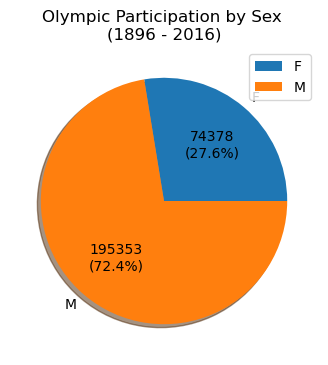

In [36]:
df_gender_split.plot.pie(y = 'Participation_Count', labels = df_gender_split['Sex'], autopct = lambda p: '{:.0f}\n({:.1f}%)'.format(p * df_gender_split['Participation_Count'].sum() / 100, p), explode = [0, 0], shadow = True, figsize = (4, 4))
plt.title('Olympic Participation by Sex \n(1896 - 2016)')
plt.ylabel('')
plt.show();

Based on the pie chart, females only make up 27.6% of the total participation in the Olympics from 1896 - 2016.

As almost all sports have their events separated between male and female, we should expect an equal distribution between genders. However, we should understand that women were only allowed to participate in the Olympics from 1900. And even then, they could only participate in a handful of events. Thus there were only 22 women compared to 975 men competing in 1900.

As the population gained more awareness on gender inequality, the push for gender equality in the Olympic Games started to mount. Slowly but surely every 4 years, women were allowed to participate in more events. By 2024, the Paris Olympic Games will feature 10,500 atheletes, with an almost equal split between male and female.

### <a id='Ideal_Height_and_Weight_of_Athlete:' href=#1> Ideal Height and Weight of Athlete: </a>

In [37]:
# Querying height and weight of male athlete by medals won
height_medal_m_split = %sql SELECT Height, Medal FROM athlete_events_dropna WHERE Sex = 'M' ORDER BY Height ASC;
df_height_medal_m_split = height_medal_m_split.DataFrame()

height_medal_m_split_gsb = %sql SELECT Height, Medal FROM athlete_events_dropna WHERE (Sex = 'M') AND Medal IN ('Gold', 'Bronze', 'Silver') ORDER BY Height ASC;
df_height_medal_m_split_gsb = height_medal_m_split_gsb.DataFrame()

weight_medal_m_split = %sql SELECT Weight, Medal FROM athlete_events_dropna WHERE Sex = 'M' ORDER BY Height ASC;
df_weight_medal_m_split = weight_medal_m_split.DataFrame()

weight_medal_m_split_gsb = %sql SELECT Weight, Medal FROM athlete_events_dropna WHERE (Sex = 'M') AND Medal IN ('Gold', 'Bronze', 'Silver') ORDER BY Height ASC;
df_weight_medal_m_split_gsb = weight_medal_m_split_gsb.DataFrame()

 * sqlite:///my_database.db
Done.
 * sqlite:///my_database.db
Done.
 * sqlite:///my_database.db
Done.
 * sqlite:///my_database.db
Done.


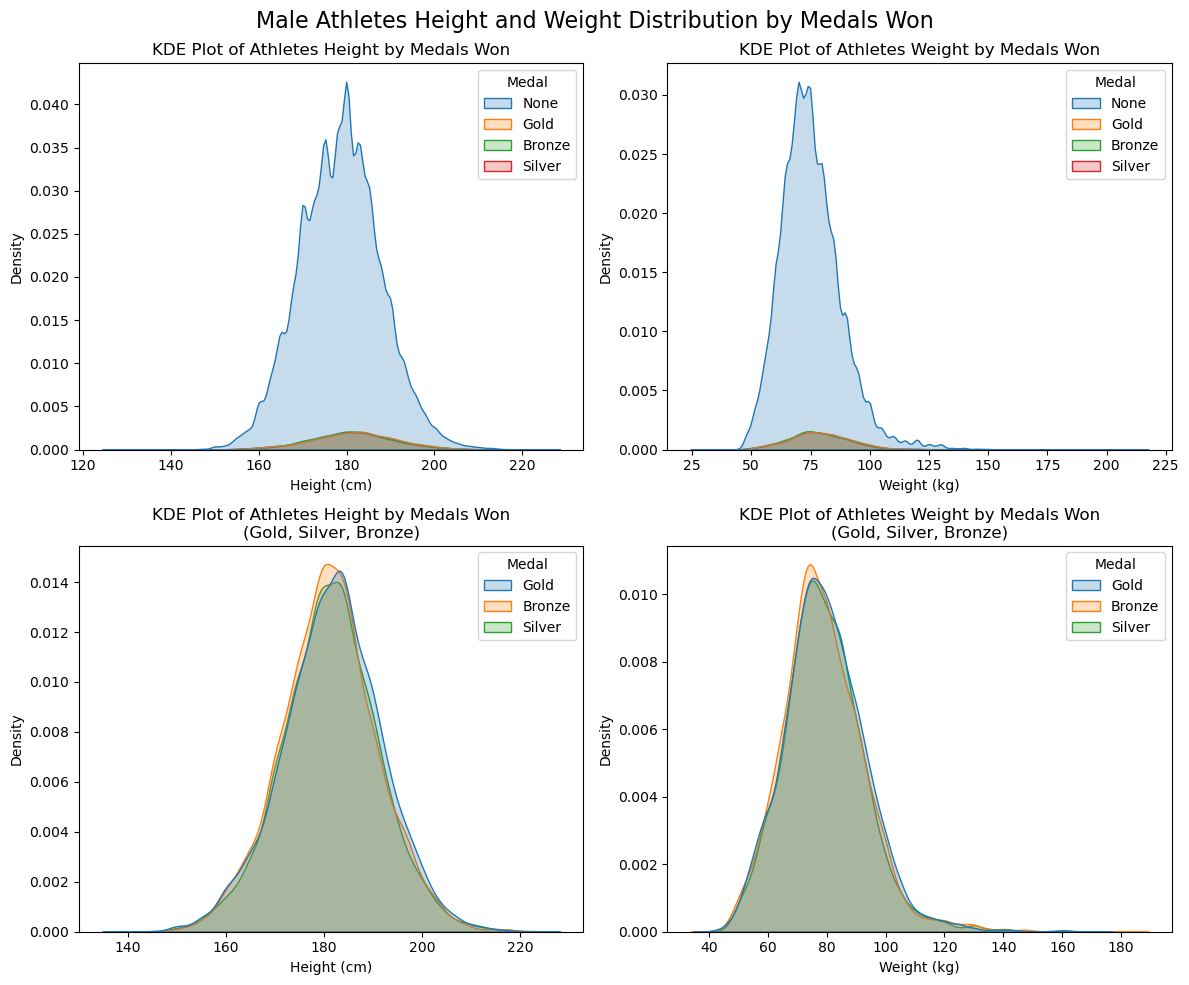

In [38]:
# KDE plot for continuous features

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))
ax0 = axes[0, 0]
ax1 = axes[0, 1]
ax2 = axes[1, 0]
ax3 = axes[1, 1]

sns.kdeplot(data = df_height_medal_m_split, x = 'Height', fill = True, hue = 'Medal', ax = ax0)
ax0.set_title('KDE Plot of Athletes Height by Medals Won');
ax0.set_xlabel('Height (cm)')

sns.kdeplot(data = df_weight_medal_m_split, x = 'Weight', fill = True, hue = 'Medal', ax = ax1)
ax1.set_title('KDE Plot of Athletes Weight by Medals Won');
ax1.set_xlabel('Weight (kg)')

sns.kdeplot(data = df_height_medal_m_split_gsb, x = 'Height', fill = True, hue = 'Medal', ax = ax2)
ax2.set_title('KDE Plot of Athletes Height by Medals Won\n(Gold, Silver, Bronze)');
ax2.set_xlabel('Height (cm)')

sns.kdeplot(data = df_weight_medal_m_split_gsb, x = 'Weight', fill = True, hue = 'Medal', ax = ax3)
ax3.set_title('KDE Plot of Athletes Weight by Medals Won\n(Gold, Silver, Bronze)');
ax3.set_xlabel('Weight (kg)')

plt.suptitle('Male Athletes Height and Weight Distribution by Medals Won', fontsize=16)
plt.tight_layout()
plt.show()

In [39]:
# Querying height and weight of female athlete by medals won
height_medal_f_split = %sql SELECT Height, Medal FROM athlete_events_dropna WHERE Sex = 'F' ORDER BY Height ASC;
df_height_medal_f_split = height_medal_f_split.DataFrame()

height_medal_f_split_gsb = %sql SELECT Height, Medal FROM athlete_events_dropna WHERE (Sex = 'F') AND Medal IN ('Gold', 'Bronze', 'Silver') ORDER BY Height ASC;
df_height_medal_f_split_gsb = height_medal_f_split_gsb.DataFrame()

weight_medal_f_split = %sql SELECT Weight, Medal FROM athlete_events_dropna WHERE Sex = 'F' ORDER BY Height ASC;
df_weight_medal_f_split = weight_medal_f_split.DataFrame()

weight_medal_f_split_gsb = %sql SELECT Weight, Medal FROM athlete_events_dropna WHERE (Sex = 'F') AND Medal IN ('Gold', 'Bronze', 'Silver') ORDER BY Height ASC;
df_weight_medal_f_split_gsb = weight_medal_f_split_gsb.DataFrame()

 * sqlite:///my_database.db
Done.
 * sqlite:///my_database.db
Done.
 * sqlite:///my_database.db
Done.
 * sqlite:///my_database.db
Done.


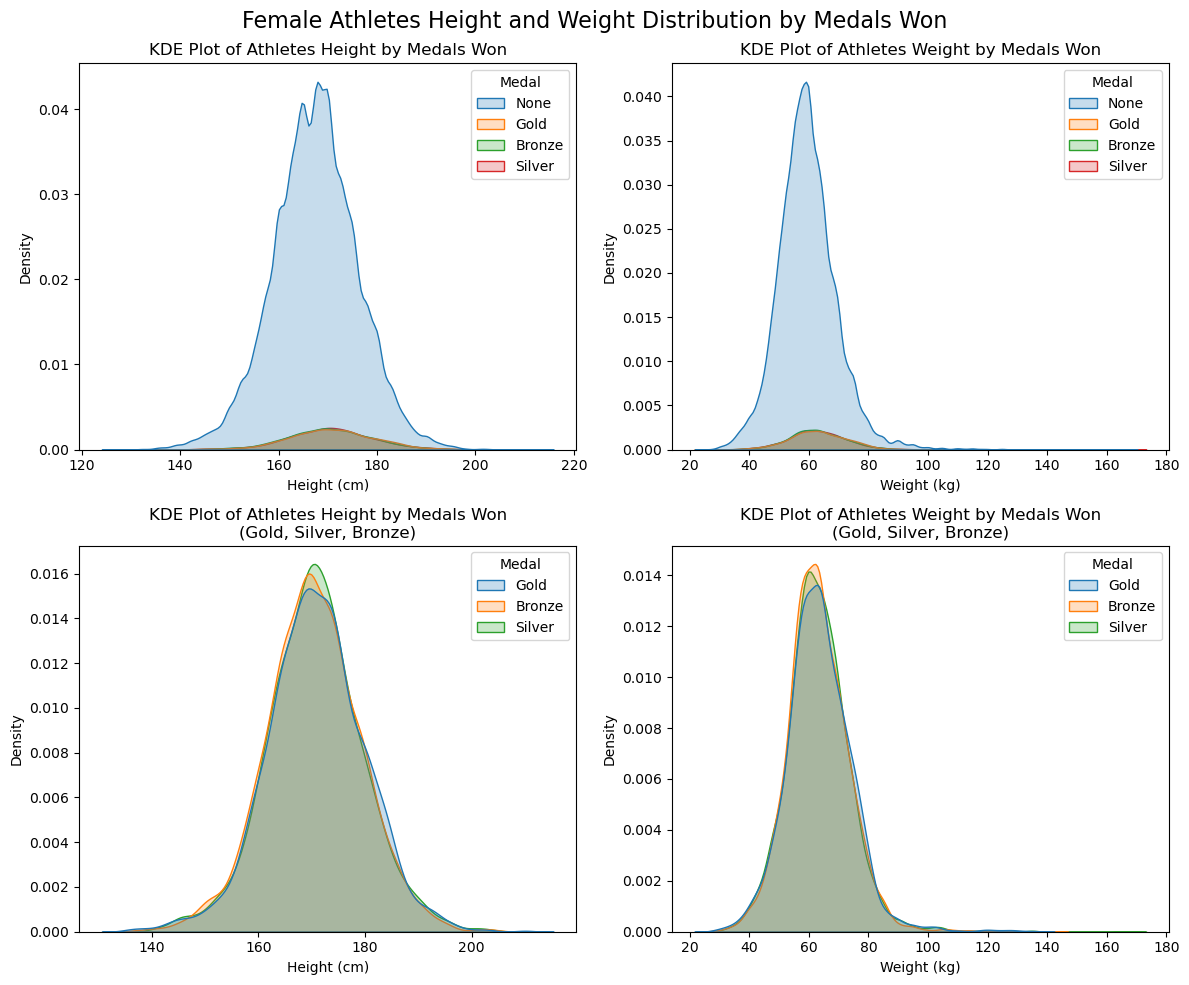

In [40]:
# KDE plot for continuous features

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))
ax0 = axes[0, 0]
ax1 = axes[0, 1]
ax2 = axes[1, 0]
ax3 = axes[1, 1]

sns.kdeplot(data = df_height_medal_f_split, x = 'Height', fill = True, hue = 'Medal', ax = ax0)
ax0.set_title('KDE Plot of Athletes Height by Medals Won');
ax0.set_xlabel('Height (cm)')

sns.kdeplot(data = df_weight_medal_f_split, x = 'Weight', fill = True, hue = 'Medal', ax = ax1)
ax1.set_title('KDE Plot of Athletes Weight by Medals Won');
ax1.set_xlabel('Weight (kg)')

sns.kdeplot(data = df_height_medal_f_split_gsb, x = 'Height', fill = True, hue = 'Medal', ax = ax2)
ax2.set_title('KDE Plot of Athletes Height by Medals Won\n(Gold, Silver, Bronze)');
ax2.set_xlabel('Height (cm)')

sns.kdeplot(data = df_weight_medal_f_split_gsb, x = 'Weight', fill = True, hue = 'Medal', ax = ax3)
ax3.set_title('KDE Plot of Athletes Weight by Medals Won\n(Gold, Silver, Bronze)');
ax3.set_xlabel('Weight (kg)')

plt.suptitle('Female Athletes Height and Weight Distribution by Medals Won', fontsize=16)
plt.tight_layout()
plt.show()

Based on the KDE plots for male athletes height and weight distribution, we see that majority of **male athletes are around 180cm tall and weights around 75kg.** Male athletes who are closer to this ideal height and weight also have a higher probability of winning events.

Based on the KDE plots for female athletes height and weight distribution, we see that majority of **female athletes are around 170cm tall and weights around 60kg.** Female athletes who are closer to this ideal height and weight also have a higher probability of winning events.

Based on this info, it can be said that the **ideal height and weight for male athletes are 180cm and 75kg** and the **ideal height and weight for female athletes are 170cm and 60kg.** This is due to the ideal height and weight having the best power to weight ratio for sports whereby our body has a balance between muscle mass for strength and power while maintaining a weight that allows for agility and speed. Talent scouts might want to target athletes within this height and weight range to have a higher chance of succeeding in the Olympics.

Note: Missing height and weight rows which accounts for 23% of the original dataset has been removed for these plots.

### <a id='Height_and_Weight_to_Medal_Count:' href=#1> Height and Weight to Medal Count: </a>

In [41]:
%%sql
SELECT Team, COUNT(Medal) AS Medal_Count, ROUND(AVG(Height), 2) AS Average_Height, ROUND(AVG(Weight), 2) AS Average_Weight
FROM athlete_events_dropna
WHERE Medal IN ('Gold', 'Silver', 'Bronze')
GROUP BY Team
ORDER BY Medal_Count DESC
LIMIT 20;

 * sqlite:///my_database.db
Done.


Team,Medal_Count,Average_Height,Average_Weight
United States,4276,179.69,75.01
Soviet Union,2203,176.99,75.25
Germany,1520,178.55,73.75
Australia,1196,178.88,74.08
Russia,1091,177.33,72.05
Canada,1024,176.16,73.39
Italy,1015,179.28,75.47
Great Britain,1012,178.71,74.01
France,966,179.15,74.57
East Germany,935,177.05,72.16


In [42]:
avg_physical_medal = %sql SELECT Team, COUNT(Medal) AS Medal_Count, ROUND(AVG(Height), 2) AS Average_Height, ROUND(AVG(Weight), 2) AS Average_Weight FROM athlete_events_dropna WHERE Medal IN ('Gold', 'Silver', 'Bronze') GROUP BY Team ORDER BY Medal_Count DESC;
df_avg_physical_medal = avg_physical_medal.DataFrame()

 * sqlite:///my_database.db
Done.


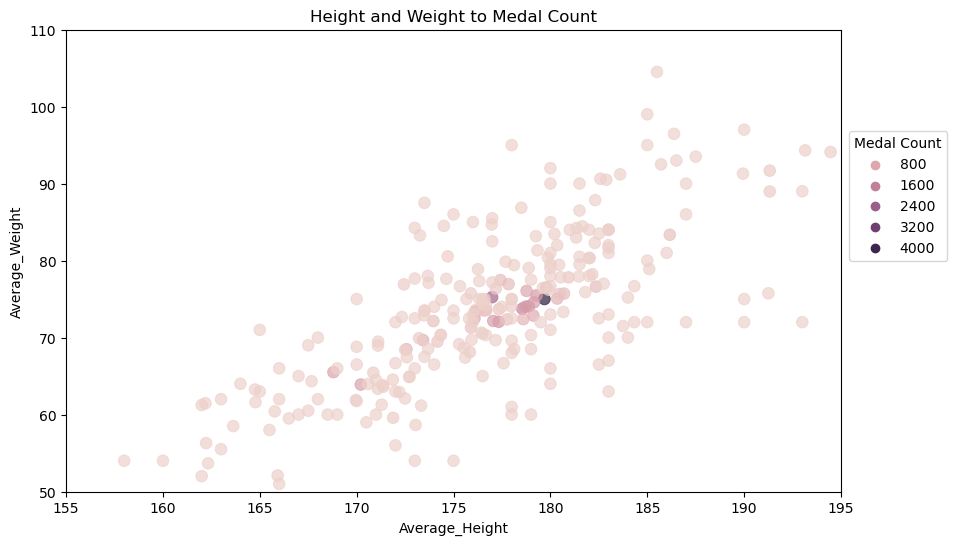

In [43]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = df_avg_physical_medal, x = "Average_Height", y = "Average_Weight", hue = "Medal_Count",
                s = 70, alpha = 0.7, edgecolor = None)

plt.title('Height and Weight to Medal Count')
plt.xlim(155, 195)
plt.ylim(50, 110)
plt.legend(title = 'Medal Count', loc= (1.01, 0.5))
plt.show();

Based on the dataset, athletes who are around the ideal height and weight suggested win more events in the Olympics.

In [44]:
conn.close()

## <a id='Conclusion' href=#1> Conclusion </a>

Based on the results of this project, we can conclude that:
1. Hypothesis 1 is not true. Countries with a higher population does not equate to winning more medals in the Olympics. **Countries which have higher priority in sports and invest in the infrastructure required produce higher quality athletes.**
2. Hypothesis 2 is true. Participants within the age of 20 to 30, especially in the mid 20s have a higher chance in winning the Olympics. **Most athletes reach their peak athletic performance along with enough competing experience when they reach their mid 20s.**
3. We have come a long way in terms of gender equality since the beginning of modern day Olympics. **In the 2024 Paris Olympics, the gender split will be equal.**
4. The **ideal height and weight for male athletes are around 180cm and 75kg.**
5. The **ideal height and weight for female athletes are around 170cm and 60kg.**